In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('train.csv')

In [3]:
labels = pd.read_csv('train_labels.csv')

In [4]:
df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [5]:
print(df.info)

<bound method DataFrame.info of                  session_id  index  elapsed_time      event_name       name  \
0         20090312431273200      0             0  cutscene_click      basic   
1         20090312431273200      1          1323    person_click      basic   
2         20090312431273200      2           831    person_click      basic   
3         20090312431273200      3          1147    person_click      basic   
4         20090312431273200      4          1863    person_click      basic   
...                     ...    ...           ...             ...        ...   
26296941  22100221145014656   1600       5483231  navigate_click  undefined   
26296942  22100221145014656   1601       5485166  navigate_click  undefined   
26296943  22100221145014656   1602       5485917  navigate_click  undefined   
26296944  22100221145014656   1603       5486753  navigate_click  undefined   
26296945  22100221145014656   1604       5487952      checkpoint      basic   

          level  pa

In [6]:
df.count()

session_id        26296946
index             26296946
elapsed_time      26296946
event_name        26296946
name              26296946
level             26296946
page                564544
room_coor_x       24223674
room_coor_y       24223674
screen_coor_x     24223674
screen_coor_y     24223674
hover_duration     2002244
text               9617139
fqid              18022531
room_fqid         26296946
text_fqid          9617244
fullscreen        26296946
hq                26296946
music             26296946
level_group       26296946
dtype: int64

In [7]:
df.nunique()

session_id           23562
index                20348
elapsed_time       5042639
event_name              11
name                     6
level                   23
page                     7
room_coor_x       17438693
room_coor_y       13651023
screen_coor_x        57924
screen_coor_y       102591
hover_duration       24101
text                   597
fqid                   128
room_fqid               19
text_fqid              126
fullscreen               2
hq                       2
music                    2
level_group              3
dtype: int64

In [8]:
df.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
count,2.629695e+07,2.629695e+07,2.629695e+07,2.629695e+07,564544.000000,2.422367e+07,2.422367e+07,2.422367e+07,2.422367e+07,2.002244e+06,2.629695e+07,2.629695e+07,2.629695e+07
mean,2.113249e+16,6.445102e+02,4.016694e+06,1.219169e+01,3.166559,-5.490579e+01,-1.162119e+02,4.584098e+02,3.855860e+02,3.471003e+03,1.370037e-01,1.202047e-01,9.293778e-01
std,5.712953e+14,5.457880e+02,3.127032e+07,6.497789e+00,2.063291,5.202926e+02,2.184710e+02,2.479389e+02,1.298166e+02,4.602024e+05,3.438513e-01,3.252008e-01,2.561926e-01
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181623e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101022e+16,2.880000e+02,4.397000e+05,6.000000e+00,1.000000,-3.528395e+02,-2.127183e+02,2.690000e+02,3.040000e+02,9.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.104021e+16,5.950000e+02,1.014801e+06,1.300000e+01,3.000000,-1.116280e+01,-9.760534e+01,4.470000e+02,3.970000e+02,4.190000e+02,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.110052e+16,8.960000e+02,1.747040e+06,1.800000e+01,5.000000,2.966515e+02,2.268786e+01,6.630000e+02,4.710000e+02,1.266000e+03,0.000000e+00,0.000000e+00,1.000000e+00
max,2.210022e+16,2.047300e+04,1.988607e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.919000e+03,1.440000e+03,2.451637e+08,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
labels.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [10]:
labels.info

<bound method DataFrame.info of                    session_id  correct
0        20090312431273200_q1        1
1        20090312433251036_q1        0
2        20090312455206810_q1        1
3        20090313091715820_q1        0
4        20090313571836404_q1        1
...                       ...      ...
424111  22100215342220508_q18        1
424112  22100215460321130_q18        1
424113  22100217104993650_q18        1
424114  22100219442786200_q18        1
424115  22100221145014656_q18        1

[424116 rows x 2 columns]>

In [11]:
labels.describe()

,correct
count,424116.000000
mean,0.705635
std,0.455757
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


**splitting the session id and question number in the labels**

In [12]:
labels["session"] = labels["session_id"].apply(lambda x:int(x.split('_')[0]))
labels["question"] = labels["session_id"].apply(lambda x:int(x.split('_')[1][1:]))
labels = labels.drop(['session_id'], axis = 'columns')

In [13]:
labels.head()

,correct,session,question
0,1,20090312431273200,1
1,0,20090312433251036,1
2,1,20090312455206810,1
3,0,20090313091715820,1
4,1,20090313571836404,1


In [14]:
labels

,correct,session,question
0,1,20090312431273200,1
1,0,20090312433251036,1
2,1,20090312455206810,1
3,0,20090313091715820,1
4,1,20090313571836404,1
...,...,...,...
424111,1,22100215342220508,18
424112,1,22100215460321130,18
424113,1,22100217104993650,18
424114,1,22100219442786200,18


### Data Correlation

<AxesSubplot:title={'center':'Correlation amongst data points in the training dataset'}>

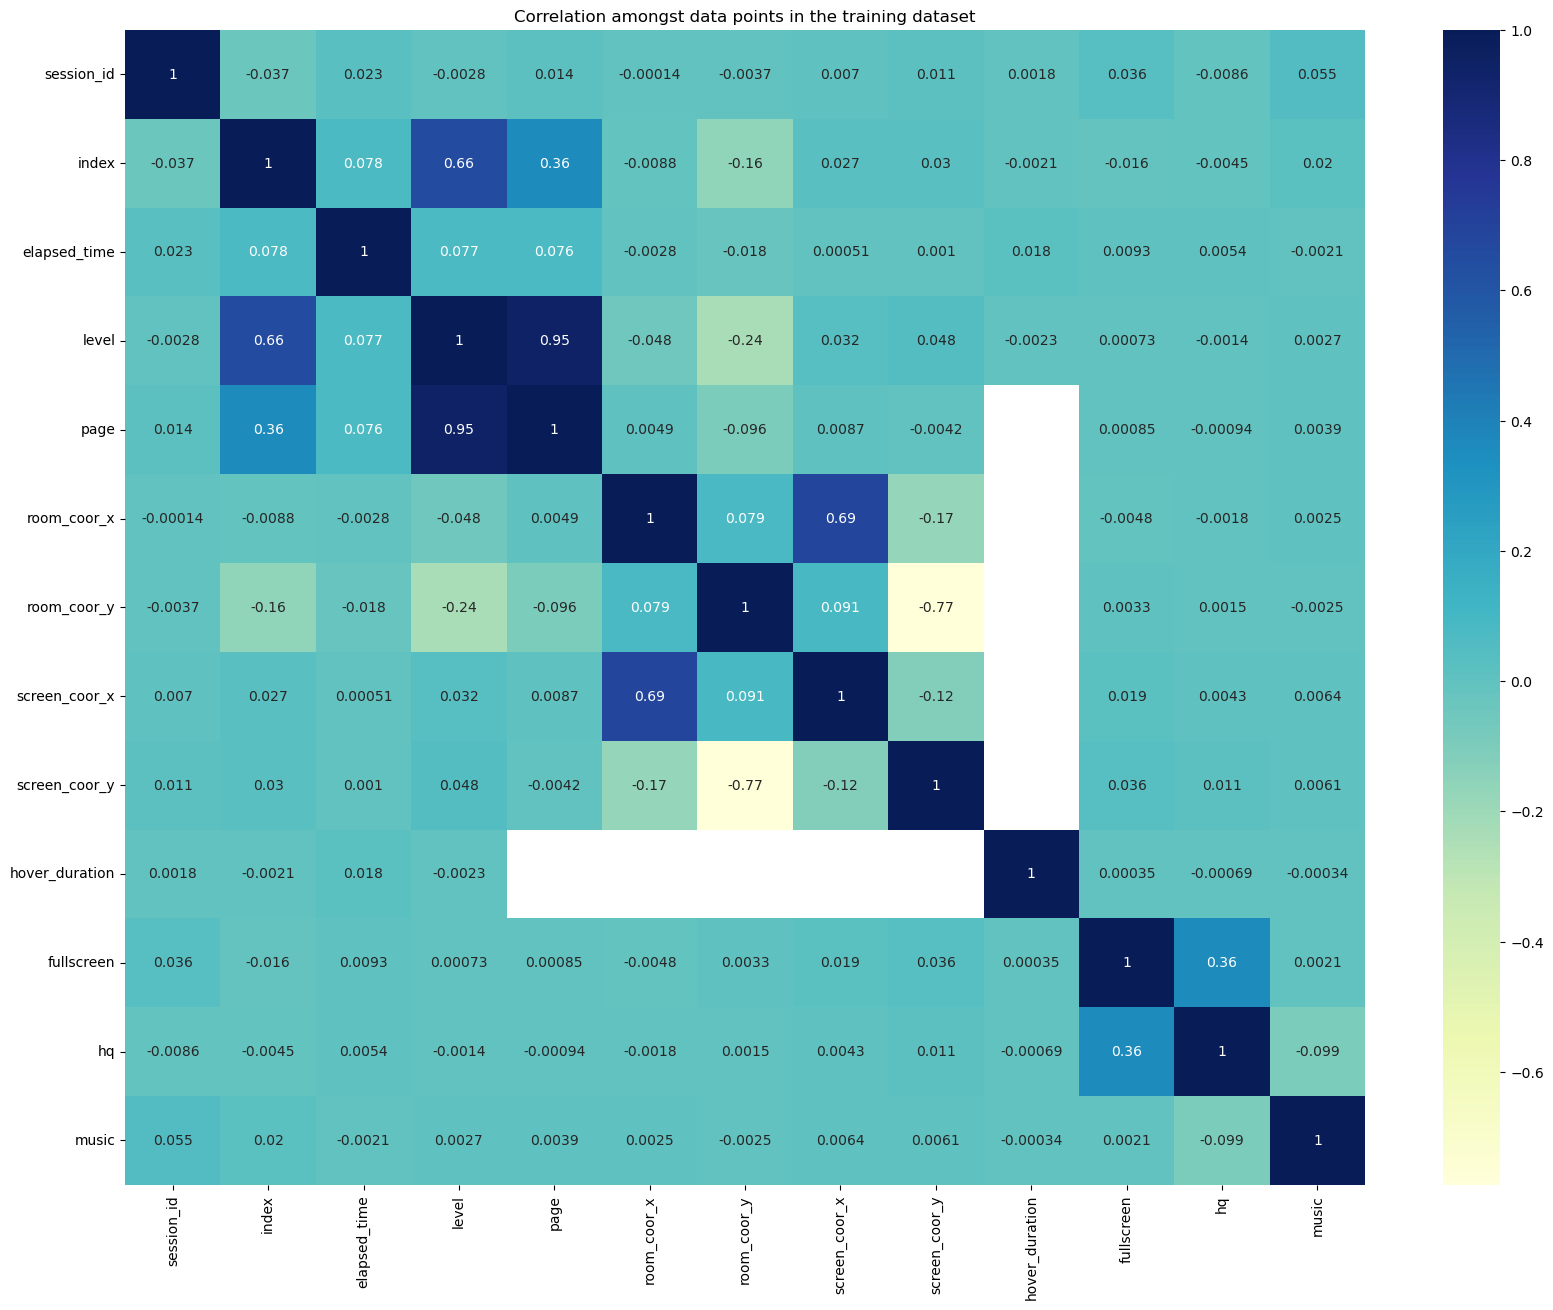

In [15]:
# sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

plt.subplots(figsize=(20,15))
plt.title("Correlation amongst data points in the training dataset")
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [16]:
df['text_fqid'].unique

<bound method Series.unique of 0                        tunic.historicalsociety.closet.intro
1           tunic.historicalsociety.closet.gramps.intro_0_...
2           tunic.historicalsociety.closet.gramps.intro_0_...
3           tunic.historicalsociety.closet.gramps.intro_0_...
4           tunic.historicalsociety.closet.gramps.intro_0_...
                                  ...                        
26296941                                                  NaN
26296942                                                  NaN
26296943                                                  NaN
26296944                                                  NaN
26296945                                                  NaN
Name: text_fqid, Length: 26296946, dtype: object>

In [17]:
# plt.boxplot(df["text"].astype(str) ,df["text_fqid"].astype(str))

<AxesSubplot:title={'center':'Correlation amongst data points in the Labels dataset'}>

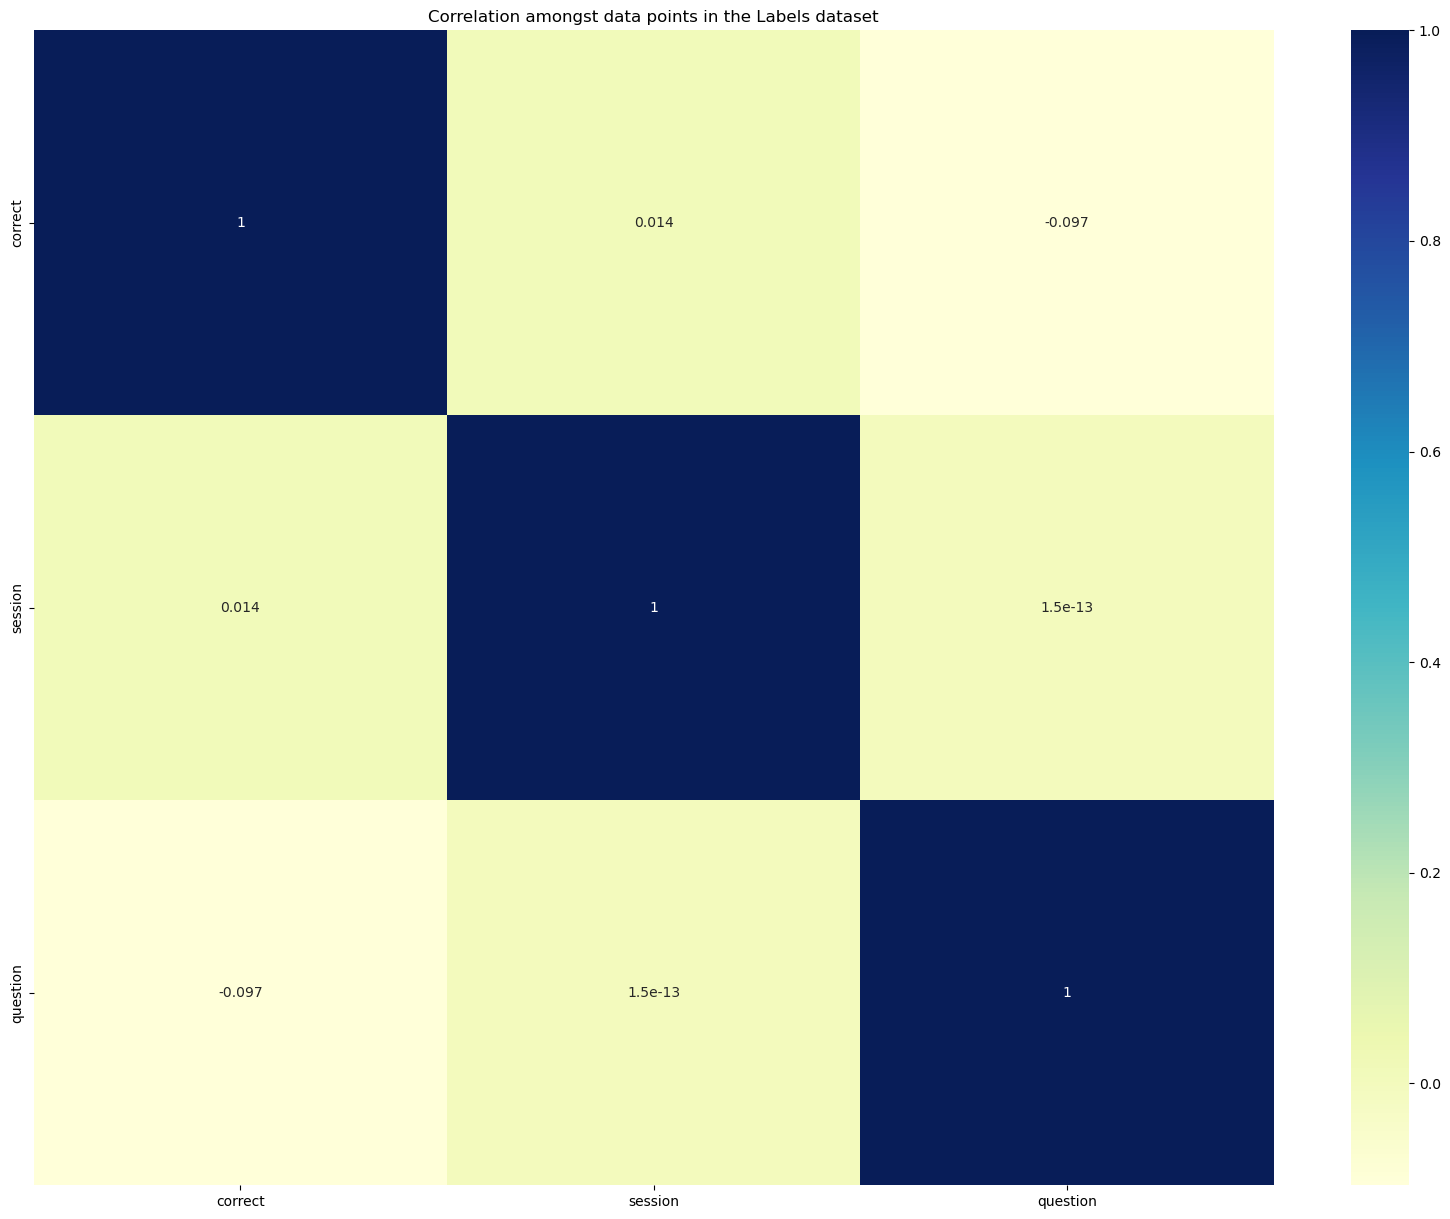

In [18]:
plt.subplots(figsize=(20,15))
plt.title("Correlation amongst data points in the Labels dataset")
sns.heatmap(labels.corr(), cmap="YlGnBu", annot=True)

### Checking the data distribution in the training set for skewness

array([[<AxesSubplot:title={'center':'session_id'}>,
        <AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'elapsed_time'}>,
        <AxesSubplot:title={'center':'level'}>],
       [<AxesSubplot:title={'center':'page'}>,
        <AxesSubplot:title={'center':'room_coor_x'}>,
        <AxesSubplot:title={'center':'room_coor_y'}>,
        <AxesSubplot:title={'center':'screen_coor_x'}>],
       [<AxesSubplot:title={'center':'screen_coor_y'}>,
        <AxesSubplot:title={'center':'hover_duration'}>,
        <AxesSubplot:title={'center':'fullscreen'}>,
        <AxesSubplot:title={'center':'hq'}>],
       [<AxesSubplot:title={'center':'music'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

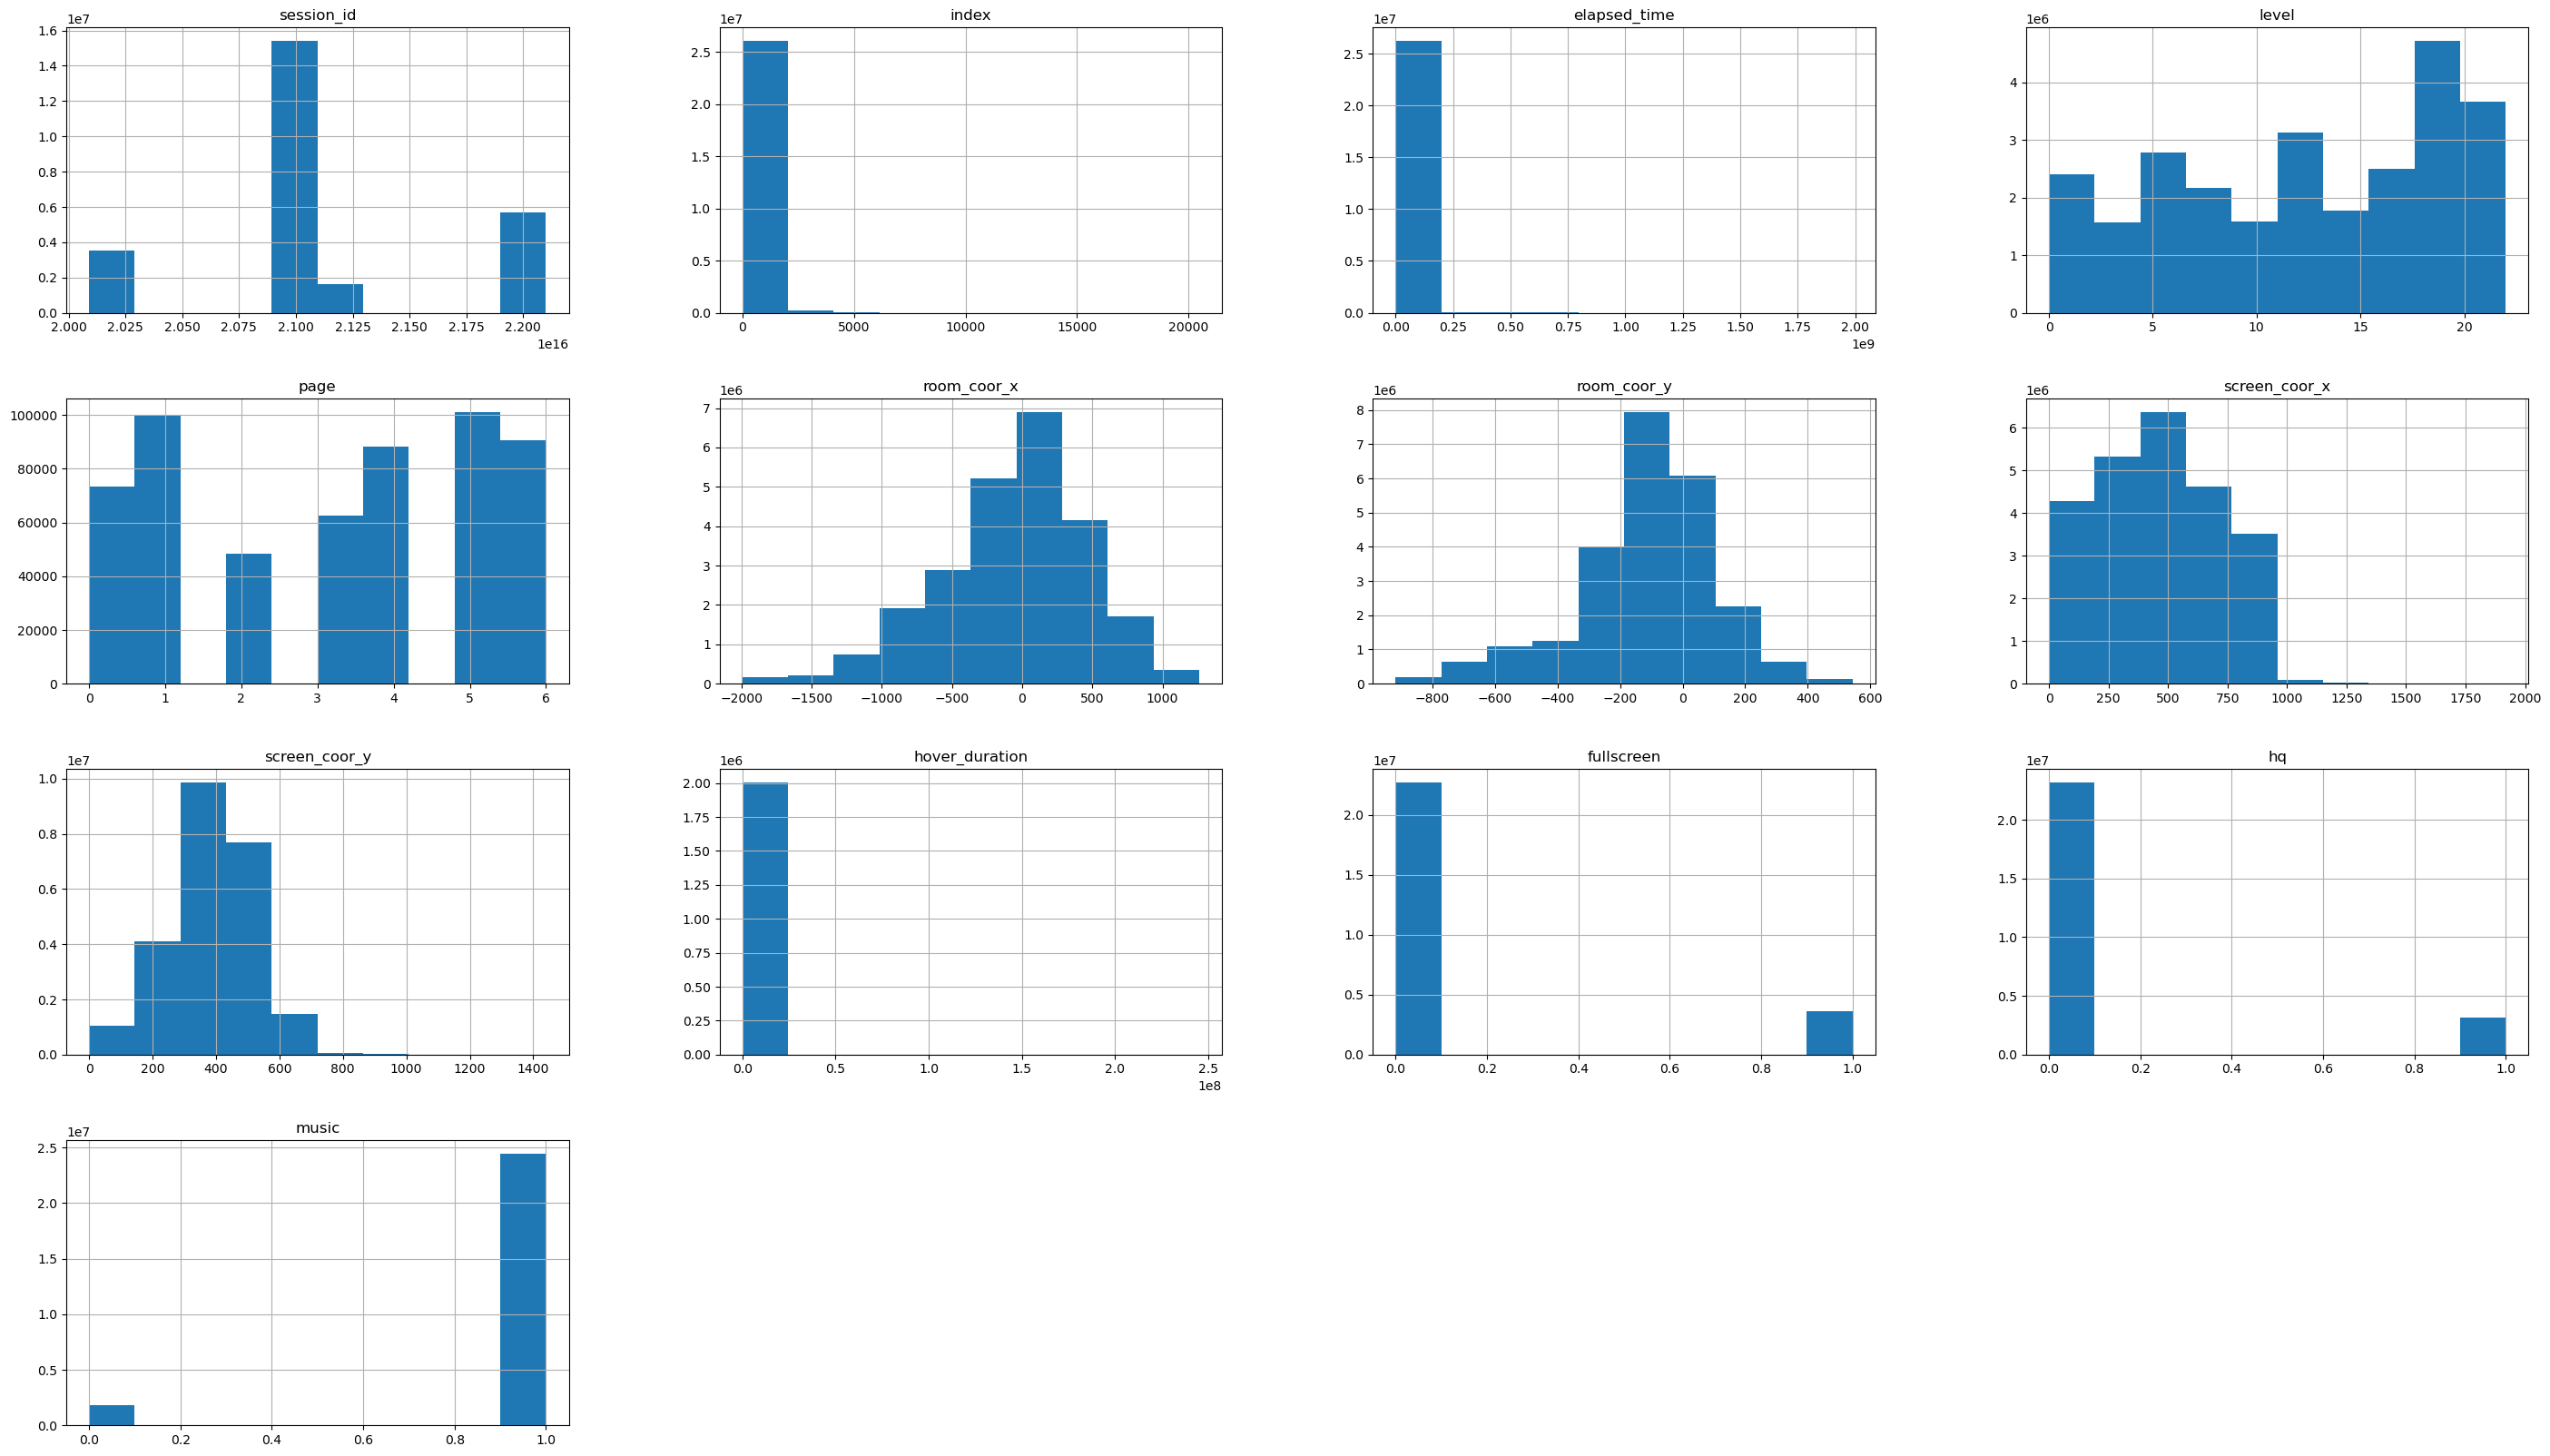

In [19]:
fig = plt.figure(figsize = (35,20))
ax = fig.gca()
df.hist(ax = ax)

**Checking missing values**

In [20]:
# Finding the number of missing values in different features of the dataset
print("Feature \t Number of missing values\n", df.isnull().sum())

Feature 	 Number of missing values
 session_id               0
index                    0
elapsed_time             0
event_name               0
name                     0
level                    0
page              25732402
room_coor_x        2073272
room_coor_y        2073272
screen_coor_x      2073272
screen_coor_y      2073272
hover_duration    24294702
text              16679807
fqid               8274415
room_fqid                0
text_fqid         16679702
fullscreen               0
hq                       0
music                    0
level_group              0
dtype: int64


In [21]:
#Using Mean(Replacing null with mean values) Imputation method to handle null values in numerical columns
# Define the imputer object
num_imputer=SimpleImputer(strategy='mean')
# Impute the missing values in the LoanAmount column
df['hover_duration'] = num_imputer.fit_transform(df[['hover_duration']])

In [22]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
cat_imputer=SimpleImputer(strategy="most_frequent")

# Impute the missing values in the Credit_History column
df['page'] = cat_imputer.fit_transform(df[['page']])

In [23]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
const_imputer=SimpleImputer(strategy="constant", fill_value=0)

# Impute the missing values in the Credit_History column
df['text'] = const_imputer.fit_transform(df[['page']])

In [24]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
cat_imputer=SimpleImputer(strategy="most_frequent")

# Impute the missing values in the Credit_History column
df['room_coor_x'] = cat_imputer.fit_transform(df[['room_coor_x']])

In [25]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
cat_imputer=SimpleImputer(strategy="most_frequent")

# Impute the missing values in the Credit_History column
df['room_coor_y'] = cat_imputer.fit_transform(df[['room_coor_y']])

In [26]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
cat_imputer=SimpleImputer(strategy="most_frequent")

# Impute the missing values in the Credit_History column
df['screen_coor_x'] = cat_imputer.fit_transform(df[['screen_coor_x']])

In [27]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
cat_imputer=SimpleImputer(strategy="most_frequent")

# Impute the missing values in the Credit_History column
df['screen_coor_y'] = cat_imputer.fit_transform(df[['screen_coor_y']])

In [28]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
cat_imputer=SimpleImputer(strategy="most_frequent")

# Impute the missing values in the Credit_History column
df['fqid'] = cat_imputer.fit_transform(df[['fqid']])

In [29]:
#Using most frequent(Replacing null with mode values) Imputation method to handle null values in categorical columns
# Define the imputer object
cat_imputer=SimpleImputer(strategy="most_frequent")

# Impute the missing values in the Credit_History column
df['text_fqid'] = cat_imputer.fit_transform(df[['text_fqid']])

In [30]:
# Finding the number of missing values in different features of the dataset
print("Feature \t Number of missing values\n", df.isnull().sum())

Feature 	 Number of missing values
 session_id        0
index             0
elapsed_time      0
event_name        0
name              0
level             0
page              0
room_coor_x       0
room_coor_y       0
screen_coor_x     0
screen_coor_y     0
hover_duration    0
text              0
fqid              0
room_fqid         0
text_fqid         0
fullscreen        0
hq                0
music             0
level_group       0
dtype: int64


In [31]:
df.dtypes

session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text              float64
fqid               object
room_fqid          object
text_fqid          object
fullscreen          int64
hq                  int64
music               int64
level_group        object
dtype: object

In [32]:
label_encoder = preprocessing.LabelEncoder()

In [33]:
df['event_name']= label_encoder.fit_transform(df['event_name'])
print(label_encoder.classes_)

['checkpoint' 'cutscene_click' 'map_click' 'map_hover' 'navigate_click'
 'notebook_click' 'notification_click' 'object_click' 'object_hover'
 'observation_click' 'person_click']


In [34]:
df['name']= label_encoder.fit_transform(df['name'])
print(label_encoder.classes_)

['basic' 'close' 'next' 'open' 'prev' 'undefined']


In [35]:
df['text']= label_encoder.fit_transform(df['text'])
print(label_encoder.classes_)

[0. 1. 2. 3. 4. 5. 6.]


In [36]:
df['fqid']= label_encoder.fit_transform(df['fqid'])
print(label_encoder.classes_)

['archivist' 'archivist_glasses' 'block' 'block_0' 'block_1' 'block_badge'
 'block_badge_2' 'block_magnify' 'block_nelson' 'block_tocollection'
 'block_tomap1' 'block_tomap2' 'boss' 'businesscards'
 'businesscards.card_0.next' 'businesscards.card_1.next'
 'businesscards.card_bingo.bingo' 'businesscards.card_bingo.next'
 'ch3start' 'chap1_finale' 'chap1_finale_c' 'chap2_finale'
 'chap2_finale_c' 'chap4_finale_c' 'coffee' 'colorbook' 'confrontation'
 'crane_ranger' 'cs' 'directory' 'directory.closeup.archivist'
 'door_block_clean' 'door_block_talk' 'doorblock' 'expert' 'flag_girl'
 'fox' 'glasses' 'gramps' 'groupconvo' 'groupconvo_flag' 'intro' 'janitor'
 'journals' 'journals.hub.topics' 'journals.pic_0.next'
 'journals.pic_1.next' 'journals.pic_2.bingo' 'journals.pic_2.next'
 'journals_flag' 'journals_flag.hub.topics' 'journals_flag.hub.topics_old'
 'journals_flag.pic_0.bingo' 'journals_flag.pic_0.next'
 'journals_flag.pic_0_old.next' 'journals_flag.pic_1.bingo'
 'journals_flag.pic_1.ne

In [37]:
df['room_fqid']= label_encoder.fit_transform(df['room_fqid'])
print(label_encoder.classes_)

['tunic.capitol_0.hall' 'tunic.capitol_1.hall' 'tunic.capitol_2.hall'
 'tunic.drycleaner.frontdesk' 'tunic.flaghouse.entry'
 'tunic.historicalsociety.basement' 'tunic.historicalsociety.cage'
 'tunic.historicalsociety.closet' 'tunic.historicalsociety.closet_dirty'
 'tunic.historicalsociety.collection'
 'tunic.historicalsociety.collection_flag' 'tunic.historicalsociety.entry'
 'tunic.historicalsociety.frontdesk' 'tunic.historicalsociety.stacks'
 'tunic.humanecology.frontdesk' 'tunic.kohlcenter.halloffame'
 'tunic.library.frontdesk' 'tunic.library.microfiche'
 'tunic.wildlife.center']


In [38]:
df['text_fqid']= label_encoder.fit_transform(df['text_fqid'])
print(label_encoder.classes_)

['tunic.capitol_0.hall.boss.talktogramps'
 'tunic.capitol_0.hall.chap1_finale_c'
 'tunic.capitol_1.hall.boss.haveyougotit'
 'tunic.capitol_1.hall.boss.writeitup'
 'tunic.capitol_1.hall.chap2_finale_c'
 'tunic.capitol_2.hall.boss.haveyougotit'
 'tunic.capitol_2.hall.chap4_finale_c'
 'tunic.drycleaner.frontdesk.block_0' 'tunic.drycleaner.frontdesk.block_1'
 'tunic.drycleaner.frontdesk.logbook.page.bingo'
 'tunic.drycleaner.frontdesk.worker.done'
 'tunic.drycleaner.frontdesk.worker.done2'
 'tunic.drycleaner.frontdesk.worker.hub'
 'tunic.drycleaner.frontdesk.worker.takealook'
 'tunic.flaghouse.entry.colorbook' 'tunic.flaghouse.entry.flag_girl.hello'
 'tunic.flaghouse.entry.flag_girl.hello_recap'
 'tunic.flaghouse.entry.flag_girl.symbol'
 'tunic.flaghouse.entry.flag_girl.symbol_recap'
 'tunic.historicalsociety.basement.ch3start'
 'tunic.historicalsociety.basement.gramps.seeyalater'
 'tunic.historicalsociety.basement.gramps.whatdo'
 'tunic.historicalsociety.basement.janitor'
 'tunic.historic

In [39]:
df['level_group']= label_encoder.fit_transform(df['level_group'])
print(label_encoder.classes_)

['0-4' '13-22' '5-12']


In [40]:
print(df.dtypes)

session_id          int64
index               int64
elapsed_time        int64
event_name          int32
name                int32
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text                int64
fqid                int32
room_fqid           int32
text_fqid           int32
fullscreen          int64
hq                  int64
music               int64
level_group         int32
dtype: object


# Data Prep for model

In [41]:
df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,1,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,41,7,34,0,0,1,0
1,20090312431273200,1,1323,10,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,38,7,33,0,0,1,0
2,20090312431273200,2,831,10,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,38,7,33,0,0,1,0
3,20090312431273200,3,1147,10,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,38,7,33,0,0,1,0
4,20090312431273200,4,1863,10,0,0,5.0,-412.991405,-159.314686,381.0,494.0,3471.003377,5,38,7,33,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,4,5,22,5.0,343.887291,36.701026,483.0,273.0,3471.003377,5,127,2,25,0,0,1,1
26296942,22100221145014656,1601,5485166,4,5,22,5.0,332.696070,141.493178,545.0,221.0,3471.003377,5,23,2,25,0,0,1,1
26296943,22100221145014656,1602,5485917,4,5,22,5.0,369.912859,140.569205,611.0,217.0,3471.003377,5,127,2,25,0,0,1,1
26296944,22100221145014656,1603,5486753,4,5,22,5.0,252.299653,123.805889,526.0,232.0,3471.003377,5,23,2,25,0,0,1,1


In [42]:
# scaler = MinMaxScaler()
# # transform data
# df = df['session_id'] +  scaler.fit_transform(df.loc[:, df.columns != 'session_id'])
# print(df)

In [43]:
df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,1,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,41,7,34,0,0,1,0
1,20090312431273200,1,1323,10,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,38,7,33,0,0,1,0
2,20090312431273200,2,831,10,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,38,7,33,0,0,1,0
3,20090312431273200,3,1147,10,0,0,5.0,-413.991405,-159.314686,380.0,494.0,3471.003377,5,38,7,33,0,0,1,0
4,20090312431273200,4,1863,10,0,0,5.0,-412.991405,-159.314686,381.0,494.0,3471.003377,5,38,7,33,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,4,5,22,5.0,343.887291,36.701026,483.0,273.0,3471.003377,5,127,2,25,0,0,1,1
26296942,22100221145014656,1601,5485166,4,5,22,5.0,332.696070,141.493178,545.0,221.0,3471.003377,5,23,2,25,0,0,1,1
26296943,22100221145014656,1602,5485917,4,5,22,5.0,369.912859,140.569205,611.0,217.0,3471.003377,5,127,2,25,0,0,1,1
26296944,22100221145014656,1603,5486753,4,5,22,5.0,252.299653,123.805889,526.0,232.0,3471.003377,5,23,2,25,0,0,1,1


In [44]:
df.shape

(26296946, 20)

In [45]:
session_group3_data = df.groupby(['session_id','level_group']).apply(lambda x: np.array(x))
session_group3_data

session_id         level_group
20090312431273200  0              [[2.00903124312732e+16, 0.0, 0.0, 1.0, 0.0, 0....
                   1              [[2.00903124312732e+16, 512.0, 836732.0, 4.0, ...
                   2              [[2.00903124312732e+16, 175.0, 221485.0, 4.0, ...
20090312433251036  0              [[2.0090312433251036e+16, 0.0, 0.0, 1.0, 0.0, ...
                   1              [[2.0090312433251036e+16, 579.0, 1176483.0, 4....
                                                        ...                        
22100219442786200  1              [[2.21002194427862e+16, 498.0, 681304.0, 4.0, ...
                   2              [[2.21002194427862e+16, 176.0, 237535.0, 4.0, ...
22100221145014656  0              [[2.2100221145014656e+16, 0.0, 0.0, 1.0, 0.0, ...
                   1              [[2.2100221145014656e+16, 845.0, 4296119.0, 4....
                   2              [[2.2100221145014656e+16, 224.0, 475261.0, 4.0...
Length: 70686, dtype: object

In [46]:
session_by_lvl = session_group3_data.reset_index()

In [47]:
df_lvl3 = session_by_lvl.loc[session_by_lvl['level_group'] == 2].iloc[:,2]
df_lvl3

2        [[2.00903124312732e+16, 175.0, 221485.0, 4.0, ...
5        [[2.0090312433251036e+16, 150.0, 266883.0, 4.0...
8        [[2.009031245520681e+16, 158.0, 380416.0, 4.0,...
11       [[2.009031309171582e+16, 186.0, 232858.0, 4.0,...
14       [[2.0090313571836404e+16, 119.0, 220779.0, 4.0...
                               ...                        
70673    [[2.2100215342220508e+16, 157.0, 601642.0, 4.0...
70676    [[2.210021546032113e+16, 152.0, 369202.0, 4.0,...
70679    [[2.210021710499365e+16, 208.0, 441324.0, 4.0,...
70682    [[2.21002194427862e+16, 176.0, 237535.0, 4.0, ...
70685    [[2.2100221145014656e+16, 224.0, 475261.0, 4.0...
Name: 0, Length: 23562, dtype: object

In [48]:
df_lvl2 = session_by_lvl.loc[session_by_lvl['level_group'] == 1].iloc[:,2]
df_lvl2

1        [[2.00903124312732e+16, 512.0, 836732.0, 4.0, ...
4        [[2.0090312433251036e+16, 579.0, 1176483.0, 4....
7        [[2.009031245520681e+16, 463.0, 747667.0, 4.0,...
10       [[2.009031309171582e+16, 549.0, 976364.0, 4.0,...
13       [[2.0090313571836404e+16, 392.0, 685544.0, 4.0...
                               ...                        
70672    [[2.2100215342220508e+16, 490.0, 1916741.0, 4....
70675    [[2.210021546032113e+16, 568.0, 1385001.0, 4.0...
70678    [[2.210021710499365e+16, 639.0, 1189538.0, 4.0...
70681    [[2.21002194427862e+16, 498.0, 681304.0, 4.0, ...
70684    [[2.2100221145014656e+16, 845.0, 4296119.0, 4....
Name: 0, Length: 23562, dtype: object

In [49]:
df_lvl1 = session_by_lvl.loc[session_by_lvl['level_group'] == 0].iloc[:,2]
df_lvl1

0        [[2.00903124312732e+16, 0.0, 0.0, 1.0, 0.0, 0....
3        [[2.0090312433251036e+16, 0.0, 0.0, 1.0, 0.0, ...
6        [[2.009031245520681e+16, 0.0, 0.0, 1.0, 0.0, 0...
9        [[2.009031309171582e+16, 0.0, 0.0, 1.0, 0.0, 0...
12       [[2.0090313571836404e+16, 0.0, 0.0, 1.0, 0.0, ...
                               ...                        
70671    [[2.2100215342220508e+16, 0.0, 0.0, 1.0, 0.0, ...
70674    [[2.210021546032113e+16, 0.0, 0.0, 1.0, 0.0, 0...
70677    [[2.210021710499365e+16, 0.0, 0.0, 1.0, 0.0, 0...
70680    [[2.21002194427862e+16, 0.0, 0.0, 1.0, 0.0, 0....
70683    [[2.2100221145014656e+16, 0.0, 0.0, 1.0, 0.0, ...
Name: 0, Length: 23562, dtype: object

In [50]:
df_lvl1.shape

(23562,)

In [51]:
df_lvl1[0].shape

(165, 20)

In [52]:
df_lvl2.shape

(23562,)

In [53]:
df_lvl2[1].shape

(420, 20)

In [54]:
df_lvl3.shape

(23562,)

In [55]:
df_lvl3[2].shape

(296, 20)

In [56]:
lvl_1_lengths =[]
for session in df_lvl1:
    lvl_1_lengths.append(session.shape[0])
avg = sum(lvl_1_lengths) / len(lvl_1_lengths)
avg

168.9587046939988

In [57]:
lvl_2_lengths =[]
for session in df_lvl2:
    lvl_2_lengths.append(session.shape[0])
avg = sum(lvl_2_lengths) / len(lvl_2_lengths)
avg

571.755496137849

In [58]:
lvl_3_lengths =[]
for session in df_lvl3:
    lvl_3_lengths.append(session.shape[0])
avg = sum(lvl_3_lengths) / len(lvl_3_lengths)
avg

375.3602410661234

In [59]:
total_over = 0
for i in lvl_1_lengths:
    if i > 1000:
        total_over += 1
total_over

2

In [60]:
total_over = 0
for i in lvl_2_lengths:
    if i > 1000:
        total_over += 1
total_over

940

In [61]:
total_over = 0
for i in lvl_3_lengths:
    if i > 1000:
        total_over += 1
total_over

103

In [63]:
max(lvl_1_lengths)

2628

In [64]:
max(lvl_2_lengths)

4702

In [65]:
max(lvl_3_lengths)

14255

In [66]:
df_lvl1 = tf.keras.utils.pad_sequences(df_lvl1, maxlen = 1000, padding='post')
df_lvl1

array([[[-2147483648,           0,           0, ...,           0,
                   1,           0],
        [-2147483648,           1,        1323, ...,           0,
                   1,           0],
        [-2147483648,           2,         831, ...,           0,
                   1,           0],
        ...,
        [          0,           0,           0, ...,           0,
                   0,           0],
        [          0,           0,           0, ...,           0,
                   0,           0],
        [          0,           0,           0, ...,           0,
                   0,           0]],

       [[-2147483648,           0,           0, ...,           0,
                   0,           0],
        [-2147483648,           1,         218, ...,           0,
                   0,           0],
        [-2147483648,           2,         448, ...,           0,
                   0,           0],
        ...,
        [          0,           0,           0, ...,  

In [67]:
df_lvl2 = tf.keras.utils.pad_sequences(df_lvl2, maxlen = 1000, padding='post')
df_lvl2

array([[[-2147483648,         512,      836732, ...,           0,
                   1,           1],
        [-2147483648,         513,      837245, ...,           0,
                   1,           1],
        [-2147483648,         514,      837779, ...,           0,
                   1,           1],
        ...,
        [          0,           0,           0, ...,           0,
                   0,           0],
        [          0,           0,           0, ...,           0,
                   0,           0],
        [          0,           0,           0, ...,           0,
                   0,           0]],

       [[-2147483648,         876,     1604754, ...,           0,
                   0,           1],
        [-2147483648,         877,     1605591, ...,           0,
                   0,           1],
        [-2147483648,         878,     1605739, ...,           0,
                   0,           1],
        ...,
        [-2147483648,        1873,     3764935, ...,  

In [68]:
df_lvl3 = tf.keras.utils.pad_sequences(df_lvl3, maxlen = 1000, padding='post')
df_lvl3

array([[[-2147483648,         175,      221485, ...,           0,
                   1,           2],
        [-2147483648,         176,      222334, ...,           0,
                   1,           2],
        [-2147483648,         177,      223251, ...,           0,
                   1,           2],
        ...,
        [          0,           0,           0, ...,           0,
                   0,           0],
        [          0,           0,           0, ...,           0,
                   0,           0],
        [          0,           0,           0, ...,           0,
                   0,           0]],

       [[-2147483648,         150,      266883, ...,           0,
                   0,           2],
        [-2147483648,         151,      268369, ...,           0,
                   0,           2],
        [-2147483648,         152,      269451, ...,           0,
                   0,           2],
        ...,
        [          0,           0,           0, ...,  

In [69]:
df_lvl1.shape

(23562, 1000, 20)

In [70]:
df_lvl2.shape

(23562, 1000, 20)

In [71]:
df_lvl3.shape

(23562, 1000, 20)

In [72]:
df_lvl1 = df_lvl1[:, :, 1:]

In [73]:
df_lvl2 = df_lvl2[:, :, 1:]

In [74]:
df_lvl3 = df_lvl3[:, :, 1:]

In [75]:
df_lvl1 = df_lvl1[:6000]

In [76]:
df_lvl2 = df_lvl2[:6000]

In [77]:
df_lvl3 = df_lvl3[:6000]

In [78]:
df_lvl1 = df_lvl1.reshape(6000*1000, 19)

In [79]:
df_lvl2 = df_lvl2.reshape(6000*1000, 19)

In [80]:
df_lvl3 = df_lvl3.reshape(6000*1000, 19)

In [81]:
scaler = MinMaxScaler()
# transform data
df_lvl1 = scaler.fit_transform(df_lvl1)
print(df_lvl1)

[[0.00000000e+00 0.00000000e+00 1.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.94741967e-04 6.01377763e-06 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.89483934e-04 3.77736146e-06 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [82]:
scaler = MinMaxScaler()
# transform data
df_lvl2 = scaler.fit_transform(df_lvl2)
print(df_lvl2)

[[0.02500855 0.00143182 0.4        ... 0.         1.         1.        ]
 [0.02505739 0.00143269 0.4        ... 0.         1.         1.        ]
 [0.02510624 0.00143361 0.4        ... 0.         1.         1.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [83]:
scaler = MinMaxScaler()
# transform data
df_lvl3 = scaler.fit_transform(df_lvl3)
print(df_lvl3)

[[9.61644137e-03 6.36055640e-04 4.00000000e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.67139246e-03 6.38493779e-04 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.72634355e-03 6.41127199e-04 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [84]:
df_lvl1 = df_lvl1.reshape(6000, 1000, 19)

In [85]:
df_lvl2 = df_lvl2.reshape(6000, 1000, 19)

In [86]:
df_lvl3 = df_lvl3.reshape(6000, 1000, 19)

In [87]:
df_lvl1.shape

(6000, 1000, 19)

In [88]:
df_lvl2.shape

(6000, 1000, 19)

In [89]:
df_lvl3.shape

(6000, 1000, 19)

In [90]:
# level_by_session

In [91]:
# session_data = df.groupby('session_id' ).apply(lambda x: np.array(x))
# session_data

In [92]:
# data_by_session = session_data.reset_index()

In [93]:
# data_by_session

In [94]:
# data_by_session = data_by_session.iloc[:,1]

In [95]:
# data_by_session

In [96]:
# data_by_session.shape

In [97]:
# data_by_session[0].shape

In [98]:
# data_by_session[0][0]

In [99]:
# data_by_session[2].shape

In [100]:
# lengths =[]
# for session in session_data:
#     lengths.append(session.shape[0])

In [101]:
# avg = sum(lengths) / len(lengths)
# avg

In [102]:
# max_events = max(lengths)
# max_events

In [103]:
# min(lengths)

In [104]:
# total_over = 0
# for i in lengths:
#     if i > 2000:
#         total_over += 1
# total_over

In [105]:
# data_by_session_test = tf.keras.utils.pad_sequences(data_by_session, maxlen = 2000, padding='post')

In [106]:
# data_by_session_test

In [107]:
# data_by_session_test.shape

In [108]:
# data_by_session_test[2000]

In [109]:
# data_by_session_test[2000].shape

In [110]:
# data_by_session_test[23][0]

In [111]:
# data_by_session_test[26][2][0]

In [112]:
# data_by_session_test[2000][0].shape

In [113]:
# data_by_session_test = data_by_session_test[:, :, 1:]

In [114]:
# data_by_session_test.shape

In [115]:
# df_f = data_by_session_test[:6000]

In [116]:
# df_f.shape

In [117]:
# df_n = df_f.reshape(6000*2000, 19)

In [118]:
# df_n

In [119]:
# scaler = MinMaxScaler()
# # transform data
# df_n = scaler.fit_transform(df_n)
# print(df_n)

In [120]:
# df_n

In [121]:
# df_f = df_n.reshape(6000, 2000, 19)

In [122]:
# df_f

In [123]:
# df_f[0][2]

In [124]:
# df_f[:,][:,][18]

In [125]:
# df_f.shape

In [126]:
# lengths2 =[]
# for session in data_by_session_test:
#     lengths2.append(session.shape[0])

In [127]:
# max(lengths2)

In [128]:
# min(lengths2)

In [129]:
sid = df.session_id.unique()

In [130]:
sid.shape

(23562,)

In [131]:
sid

array([20090312431273200, 20090312433251036, 20090312455206810, ...,
       22100217104993650, 22100219442786200, 22100221145014656],
      dtype=int64)

In [132]:
session_correct = [[sid]]

In [133]:
correct = labels.groupby('question').apply(lambda x: np.array(x))
correct

question
1     [[1, 20090312431273200, 1], [0, 20090312433251...
2     [[1, 20090312431273200, 2], [1, 20090312433251...
3     [[1, 20090312431273200, 3], [1, 20090312433251...
4     [[1, 20090312431273200, 4], [1, 20090312433251...
5     [[1, 20090312431273200, 5], [0, 20090312433251...
6     [[1, 20090312431273200, 6], [1, 20090312433251...
7     [[1, 20090312431273200, 7], [1, 20090312433251...
8     [[1, 20090312431273200, 8], [0, 20090312433251...
9     [[1, 20090312431273200, 9], [1, 20090312433251...
10    [[1, 20090312431273200, 10], [0, 2009031243325...
11    [[1, 20090312431273200, 11], [0, 2009031243325...
12    [[1, 20090312431273200, 12], [1, 2009031243325...
13    [[0, 20090312431273200, 13], [0, 2009031243325...
14    [[1, 20090312431273200, 14], [1, 2009031243325...
15    [[1, 20090312431273200, 15], [0, 2009031243325...
16    [[0, 20090312431273200, 16], [1, 2009031243325...
17    [[1, 20090312431273200, 17], [0, 2009031243325...
18    [[1, 20090312431273200, 18], [1, 

In [134]:
correct = correct.reset_index()

In [135]:
correct = correct.iloc[:,1]

In [136]:
correct

0     [[1, 20090312431273200, 1], [0, 20090312433251...
1     [[1, 20090312431273200, 2], [1, 20090312433251...
2     [[1, 20090312431273200, 3], [1, 20090312433251...
3     [[1, 20090312431273200, 4], [1, 20090312433251...
4     [[1, 20090312431273200, 5], [0, 20090312433251...
5     [[1, 20090312431273200, 6], [1, 20090312433251...
6     [[1, 20090312431273200, 7], [1, 20090312433251...
7     [[1, 20090312431273200, 8], [0, 20090312433251...
8     [[1, 20090312431273200, 9], [1, 20090312433251...
9     [[1, 20090312431273200, 10], [0, 2009031243325...
10    [[1, 20090312431273200, 11], [0, 2009031243325...
11    [[1, 20090312431273200, 12], [1, 2009031243325...
12    [[0, 20090312431273200, 13], [0, 2009031243325...
13    [[1, 20090312431273200, 14], [1, 2009031243325...
14    [[1, 20090312431273200, 15], [0, 2009031243325...
15    [[0, 20090312431273200, 16], [1, 2009031243325...
16    [[1, 20090312431273200, 17], [0, 2009031243325...
17    [[1, 20090312431273200, 18], [1, 200903124

In [137]:
correct.shape

(18,)

In [138]:
correct[17].shape

(23562, 3)

In [139]:
correct[0].shape

(23562, 3)

In [140]:
# for q in correct:
#     q.truncate(after=6000)

In [141]:
# correct[0].iloc[:,0]

In [142]:
# for q in range(0,17):
#     correct[i] = pd.DataFrame(correct, columns = ['Correct','session_id','Question'])    

In [143]:
correct[0]

array([[                1, 20090312431273200,                 1],
       [                0, 20090312433251036,                 1],
       [                1, 20090312455206810,                 1],
       ...,
       [                1, 22100217104993650,                 1],
       [                0, 22100219442786200,                 1],
       [                0, 22100221145014656,                 1]],
      dtype=int64)

In [144]:
correct[2]

array([[                1, 20090312431273200,                 3],
       [                1, 20090312433251036,                 3],
       [                1, 20090312455206810,                 3],
       ...,
       [                1, 22100217104993650,                 3],
       [                1, 22100219442786200,                 3],
       [                0, 22100221145014656,                 3]],
      dtype=int64)

In [145]:
labels.shape

(424116, 3)

In [146]:
labels = labels.pivot(columns='question', values='correct', index='session')
labels.columns = [i for i in range(1, 19)] 
labels

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
session,,,,,,,,,,,,,,,,,,
20090312431273200,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
20090312433251036,0,1,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1
20090312455206810,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
20090313091715820,0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,1
20090313571836404,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100215342220508,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1
22100215460321130,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1
22100217104993650,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1


In [147]:
labels.shape

(23562, 18)

In [148]:
labels_f = labels[:6000]

In [149]:
labels_f.shape

(6000, 18)

In [150]:
qn=2
labels_f[qn].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [151]:
labels_q1 = labels_f[qn].to_numpy()
labels_q1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [152]:
# Create an empty dictionary to store the models created for each question.
models = {}

# Create an empty dictionary to store the evaluation score for each question.
evaluation_dict ={}

In [153]:
from tensorflow import keras
from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from keras.layers import Dense, Activation, LSTM, Embedding, Dropout
from keras import optimizers

In [154]:
# n_input = 2000
# # 23562
# # 18849
# n_features = 19

# # define model
# model = Sequential()
# model.add(LSTM(20, activation='relu', input_shape=(1000, 19), return_sequences=True))

# # model.add(LSTM(10, activation='relu', return_sequences=True))
# # model.add(Dense(1))
# model.add(Dense(1, activation='sigmoid'))
# # model.add(Dense(1))
# # model.add(Activation('sigmoid'))


# model.compile(optimizer=sgd, loss='mse')
# model.summary()



In [160]:
model = keras.Sequential()
model.add(LSTM(20, input_shape = (1000, 19)))
# model.add(LSTM(20, input_shape = (1000, 19), return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(15))
model.add(Dense(1, activation="sigmoid"))

# sgd = optimizers.SGD(lr=0.2, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.2)

model.compile(loss="binary_crossentropy"
              , metrics=[keras.metrics.binary_accuracy]
              , optimizer=sgd)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20)                3200      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,221
Trainable params: 3,221
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Iterate through questions 1 to 18 to train models for each question, evaluate
# the trained model and store the predicted values.
for q_no in range(1,19):

    # Select level group for the question based on the q_no.
    if q_no<=3: df_f = df_lvl1
    elif q_no<=13: df_f = df_lvl2
    elif q_no<=22: df_f = df_lvl3
    print("### q_no: ", q_no)
    
    
    X_train, X_test, y_train, y_test = train_test_split(df_f, labels_f[q_no].to_numpy(), test_size = 0.2)
    
    model.fit(X_train,y_train)

# Evaluate the performance of the bagging classifier on the testing data
    predict = model.predict(X_test, verbose=0)
#     print(predict.shape)
#     print(predict.shape[0])
#     print(predict)
#     print(predict[0])
#     print(predict[1])
#     print(y_test)
    
    for i in range(0,predict.shape[0]):
        if(predict[i] > .5):
            predict[i] = 1
        elif(predict[i] <= .5):
            predict[i] = 0

    score = accuracy_score(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    f1= f1_score(y_test, predict)
    auc= roc_auc_score(y_test, predict)
    lstm_fpr, lstm_tpr, _ = roc_curve(y_test,  predict)


    # Evaluate the trained model on the validation dataset and store the 
    # evaluation accuracy in the `evaluation_dict`.
       

    # Use the trained model to make predictions on the validation dataset and 
    # store the predicted values in the `prediction_df` dataframe.

    evaluation_dict[q_no] = [[score,precision,recall,f1,auc,lstm_fpr, lstm_tpr]]


### q_no:  1
150/150 [==============================] - 42s 237ms/step - loss: 0.5973 - binary_accuracy: 0.7190
### q_no:  2
150/150 [==============================] - 35s 232ms/step - loss: 0.0980 - binary_accuracy: 0.9827
### q_no:  3
150/150 [==============================] - 35s 233ms/step - loss: 0.2514 - binary_accuracy: 0.9323
### q_no:  4
150/150 [==============================] - 35s 235ms/step - loss: 0.5096 - binary_accuracy: 0.7917
### q_no:  5
150/150 [==============================] - 35s 232ms/step - loss: 0.6885 - binary_accuracy: 0.5510
### q_no:  6
150/150 [==============================] - 35s 233ms/step - loss: 0.5449 - binary_accuracy: 0.7644
### q_no:  7
150/150 [==============================] - 37s 244ms/step - loss: 0.5859 - binary_accuracy: 0.7235
### q_no:  8
150/150 [==============================] - 37s 245ms/step - loss: 0.6733 - binary_accuracy: 0.6062
### q_no:  9
150/150 [==============================] - 36s 240ms/step - loss: 0.5895 - binary_accuracy:

In [162]:
score = 0
precision = 0
recall = 0
f1 = 0
auc = 0
fpr =0 
tpr =0
for name, value in evaluation_dict.items():
    print(f'question {name}: score {value[0][0]} precision {value[0][1]} recall {value[0][2]} f1 {value[0][3]} auc {value[0][4]} fpr {value[0][5]} tpr {value[0][6]}')
    score += value[0][0]
    precision += value[0][1]
    recall += value[0][2]
    f1 += value[0][3]
    auc += value[0][4]
    
print("\nAverage accuracy", score/18)
print("\nAverage precision", precision/18)
print("\nAverage recall", recall/18)
print("\nAverage f1", f1/18)
print("\nAverage auc", auc/18)

question 1: score 0.7125 precision 0.7125 recall 1.0 f1 0.832116788321168 auc 0.5 fpr [0. 1.] tpr [0. 1.]
question 2: score 0.9766666666666667 precision 0.9766666666666667 recall 1.0 f1 0.988195615514334 auc 0.5 fpr [0. 1.] tpr [0. 1.]
question 3: score 0.9325 precision 0.9325 recall 1.0 f1 0.9650711513583441 auc 0.5 fpr [0. 1.] tpr [0. 1.]
question 4: score 0.8041666666666667 precision 0.8159722222222222 recall 0.9761163032191069 f1 0.8888888888888888 auc 0.5408007676433088 fpr [0.         0.89451477 1.        ] tpr [0.        0.9761163 1.       ]
question 5: score 0.5491666666666667 precision 0.5359307359307359 recall 0.9919871794871795 f1 0.6958965711073637 auc 0.530715811965812 fpr [0.         0.93055556 1.        ] tpr [0.         0.99198718 1.        ]
question 6: score 0.785 precision 0.7954545454545454 recall 0.974304068522484 f1 0.875842155919153 auc 0.5473024102010916 fpr [0.         0.87969925 1.        ] tpr [0.         0.97430407 1.        ]
question 7: score 0.7225 precis

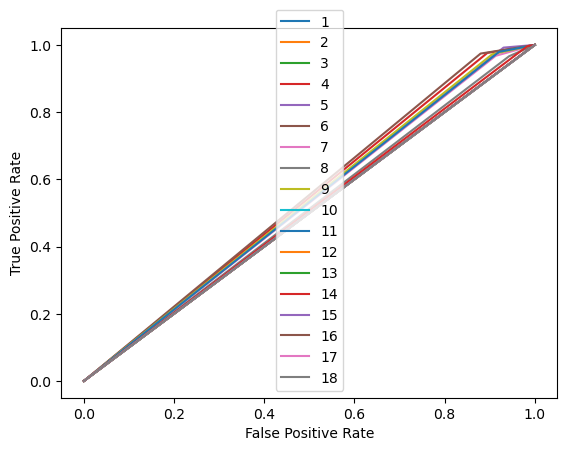

In [163]:
for name, value in evaluation_dict.items():
  plt.plot(value[0][5], value[0][6], label=name)  
    
# plt.plot(lstm_fpr,lstm_tpr, label="LSTM")
#plt.plot(gnb_fpr,gnb_tpr, label="GNB")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()